<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/HW13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.3 Linear Regression**


*   QR Decomposition
*   Least-squares decomposition
*   Linear Regression


---



In [24]:
import numpy as np
import matplotlib.pyplot as plt

# **1.3.2 Least-squares problems**



Let A ∈ R<sup>*n*x*m*</sup> and b ∈ R<sup>*n*</sup>. In trying to solve the system Ax=b, we find that the system is inconsistent. If A is a square matrix (*n* = *m*), we can use A<sup>-1</sup> to solve the system. However, in cases where A is not a square matrix, we cannot use A<sup>-1</sup>, thus we approximate the solution $\hat{x}$, such that:

dist(b,A$\hat{x}$) ≤ dist(b,Ax) for all other vectors x in R<sup>*n*</sup>

Where dist(v,w) = ||v-w|| is the distance between vectors v and w.

We can derive a solution for the least-squares problem where:

In [ ]:
A = np.random.random((3, 2))
b = np.random.random((3, 1))
print("A: ", A)
print("b: ", b)

A:  [[0.99760001 0.86319897]
 [0.87973183 0.52044314]
 [0.15975445 0.75834877]]
b:  [[0.31732097]
 [0.83509295]
 [0.55138684]]


In [ ]:
squaredA = np.matmul(np.transpose(A),A) #create a square matrix from A
print(squaredA)

[[1.79465536 1.44012729]
 [1.44012729 1.59106639]]


In [ ]:
Atb = np.matmul(np.transpose(A), b) #compute transpose of A times B
print(Atb)

[[1.13930375]
 [1.12667306]]


In [ ]:
#We can now solve Ax=b, as we have a square matrix A (squaredA)
x = np.linalg.solve(squaredA, Atb)
print("Least squares solution:")
print(x)

Least squares solution:
[[0.24333671]
 [0.4878723 ]]


We can determine the precision of our estimation by calculating its residual. A smaller residual is always better.

In [ ]:
def residual(a, x, b):
  return b - A @ x
print("Residual: ", np.linalg.norm(residual(A, x, b)))

Residual:  0.5245886655828828


For the projection A*x* to be the best estimation of b, we want the former to be the closest possible vector within the column space of A. Thus, the residual vector should be orthogonal to the column space of A.


In [ ]:
def isOrthogonal(residual, A):
  for i in range(A.shape[1]):
    dot_product = np.dot(A[:, i], residual)
    if not np.isclose(dot_product, 0, atol=1e-10):
      return False
  return True
r = residual(A, x, b)
print("Orthogonality: ", isOrthogonal(r, A))

Orthogonality:  True


# **1.3.1 QR Decomposition**





QR Decomposition utilizes the result of the gram-schmidt process,

In [ ]:
A = np.random.random((5,4))
Q, R = np.linalg.qr(A)
print("Q: ", Q)
print("R: ", R)

Q:  [[-0.19549363 -0.57401745  0.63538687 -0.16330527]
 [-0.10051841 -0.16683731 -0.12006603 -0.88372324]
 [-0.56420605 -0.06617225  0.32973518  0.34226426]
 [-0.75192771  0.45004444 -0.16505925 -0.1706553 ]
 [-0.26068091 -0.66011402 -0.66775582  0.21470112]]
R:  [[-1.312405   -1.03995966 -0.88150656 -1.25223264]
 [ 0.         -1.0862184  -0.62572231 -0.48706494]
 [ 0.          0.         -0.4144449   0.45280922]
 [ 0.          0.          0.         -0.31630432]]


In [ ]:
proj = np.matmul(Q, np.transpose(Q))
print("Projection matrix: ", proj)

Projection matrix:  [[ 0.79809888  0.18344652  0.30189856 -0.18834386 -0.02946668]
 [ 0.18344652  0.83332125 -0.27430378  0.17112844  0.0267733 ]
 [ 0.30189856 -0.27430378  0.54857735  0.28162666  0.04406091]
 [-0.18834386  0.17112844  0.28162666  0.82430307 -0.02748805]
 [-0.02946668  0.0267733   0.04406091 -0.02748805  0.99569945]]


# **1.3.3 Linear Regression**

Given a set of data points (x<sub>i</sub>, y<sub>i</sub>) for all *i* up to *n*, we wish to find a function of the form:

$\hat{y}$ = β<sub>0</sub> + β<sub>1</sub>x

that can be used to predict the y<sub>i</sub>'s with $\hat{y}$'s while minimizing:

(y<sub>i</sub> - $\hat{y}$)<sup>2</sup> for all *i*'s up to *n*

Our task is to find the values of β<sub>0</sub> and β<sub>1</sub>.



In [45]:
X = 2 * np.random.rand(100, 1)
y = 7 + 3 * X + np.random.rand(100, 1)
print("X (first 5): ")
print(X[:5])
print("")
print("y (first 5): ")
print(y[:5])

X (first 5): 
[[0.80871621]
 [0.47379269]
 [1.53618235]
 [1.3360236 ]
 [1.48937656]]

y (first 5): 
[[ 9.96462146]
 [ 8.69203929]
 [12.03365389]
 [11.10704719]
 [11.69391829]]


In [46]:
X_1D = X.ravel()
beta = np.polyfit(X_1D, y, 1)
predict = np.poly1d(beta.ravel())
print(predict)

 
2.953 x + 7.549


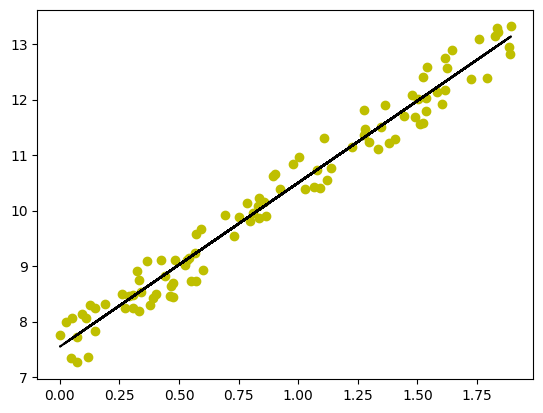

In [47]:
y_1D = y.ravel()
predicted_values = predict(X_1D)
plt.plot(X_1D,y_1D, 'yo', X_1D, predicted_values, '--k')

We can calculate the R<sup>2</sup> (coefficient of determination) to examine the "goodness of fit", or how strongly correlated our data is. A higher R<sup>2</sup> is always better.

In [48]:
residuals = y_1D - predicted_values #residuals: difference between true and predicted values
RSS = np.sum(residuals**2) #RSS: residual sum of squares
TSS = np.sum((y_1D - np.mean(y_1D))**2) #TSS: total sum of squares
R_squared = 1 - (RSS / TSS)
print("R-squared: ", R_squared)

R-squared:  0.9690330557806268
